# **TP2 - Construction, apprentissage et évaluation de premiers classifieurs supervisés**


# Context & Objectives

This TP aims to make you more familiar with the process of building from scratch a machine learning model. In this TP we will see the famous classification model [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression), that will be used in a binary classification task with synthetic data.

# 1. Dataset preparation: generating synthetic data distributed normally

The normal distribution, also known as the Gaussian distribution, is so called because it is based on the Gaussian function. This distribution is defined by two parameters: the mean $\mu$, i.e. the expected value of the distribution, and the standard deviation $\sigma^2$, i.e. the expected deviation from the mean. The square of the standard deviation is typically referred to as the variance. We denote this distribution as: $\mathcal{N}(\mathbf{\mu}, \sigma^2)$.

Given this mean and variance, its Probability Densitiy Function (PDF) for a value $x$ is:

\begin{equation}
p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)} \tag{eq. 1.1}
\end{equation}

We call this distribution the univariate normal because it consists of only one random normal variable. Here is the python code that implements this equation:



In [120]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

A multivariate normal distribution is a generalization of the one-dimensional (univariate) normal distribution to $d$ dimensions. This distribution has a joint PDF given by

\begin{equation}
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)} \tag{eq. 1.2}
\end{equation}

where $\mathbf{x} \in \mathcal{R}^d$ is a random vector of size $d$, $\mu$ is the mean vector, $\Sigma$ is the covariance matrix (of size $d \times d$, symmetric, positive definite), and $| \Sigma |$ its determinant. In short, we denote this multivariate normal distribution as: $\mathcal{N}(\mathbf{\mu}, \Sigma)$.



**Question 1.1 (BONUS, the solution is given..)** : write the function `def my_multivariate_normal(x, mean, covariance)` which computes a multivariate normal distribution based on eq. 1.2. This function should be valid for $\mathbf{x} \in \mathcal{R}^d$ with $d > 1$. `mean` needs to be an array with shape $(1,d)$ and `covariance` an array with shape $(d,d)$.

Using the following cell, verify that your function gives a similar result to the scipy [multivariate_normal](https://scipy.github.io/devdocs/generated/scipy.stats.multivariate_normal.html) function for $\textbf{x}=[0,1]^T$.

In [121]:
def my_multivariate_normal(x, mean, covariance):
    """pdf of the multivariate normal distribution."""
    xm = x - mean
    d = covariance.shape[0]
    
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp( - ((xm).T.dot(np.linalg.inv(covariance))).dot(xm) / 2 ))  

In [122]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as scipy_multivariate_normal
import numpy as np

print(my_multivariate_normal( np.array([[0.], [1.]]) ,np.array([[20.], [10.]]) , np.array([[10., 0.],[0., 10.]])  ) )
print(scipy_multivariate_normal([20, 10], [[10,0], [0, 10]]).pdf([0,1]))

[[5.71528434e-13]]
5.71528434131016e-13


Below, we compute and plot two bivariate distributions $\mathcal{N_1}(\mathbf{\mu_1}, \Sigma_1)$ and $\mathcal{N_2}(\mathbf{\mu_2}, \Sigma_2)$, where $\mu_1 =
\begin{bmatrix}
20 \\
10
\end{bmatrix}
$
and $\mu_2 =
\begin{bmatrix}
20 \\
10
\end{bmatrix}
$
, and the $\Sigma_1$ and $\Sigma_2$ will have to be defined so that the two variables $x_1$ and $x_2$ are independent in $\mathcal{N_1}$, and correlated in $\mathcal{N_2}$.

In [123]:
from matplotlib import cm # Colormaps
from matplotlib import pyplot as plt

# Plot bivariate distribution
def generate_surface(mean, covariance, nb_of_x):
    # nb_of_x is the grid size
    """Helper function to generate density surface."""
    x1s = np.linspace(10, 30, num=nb_of_x)
    x2s = np.linspace(0,20, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
          pdf[i,j] = my_multivariate_normal( np.matrix([[x1[i,j]], [x2[i,j]]]), mean, covariance )
    return x1, x2, pdf 

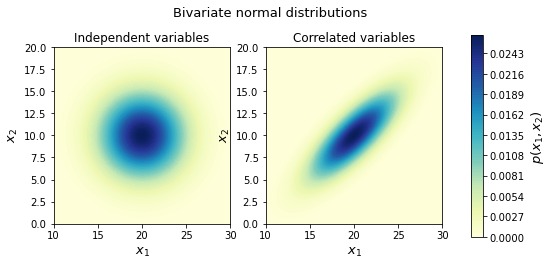

In [124]:
nb_of_x = 100 # grid size

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
    
# Plot of uncorrelated Normals
x1, x2, p = generate_surface( np.matrix([[20.], [10.]]) , np.matrix([[1., 0.],[0., 1.]])*10 , nb_of_x)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
# ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
x1, x2, p = generate_surface( np.matrix([[20.], [10.]]) , np.matrix([[1., 0.8],[0.8, 1.]])*10, nb_of_x)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
# ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

**Question 1.3**: create a synthetic dataset for a binary classification task, containing normally distributed data with $n=5000$ samples per class and $d=2$ features per sample. Using the `scatter` function, plot the feature matrix $X$ against its two dimensions. Choose the parameters mean and covariance so that your two distributions are readily separable to the naked eye. 

*tips 1*: to build the feature matrix $X$ you can use the numpy [multivariate_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) function (yet another python function to generate normal distributions!). 

*tips 2*: your label vector *y* is a binary variable, so it should contain only 0 and 1 values. To visualize your distributions, do not forget to use the *c* parameters of the function scatter.


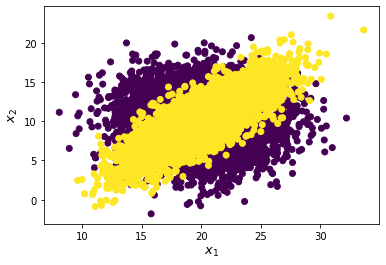

In [125]:
def generate_dataset(n, d, mean1, mean2, cov1, cov2):
    """Helper function to generate dataset."""
    X1 = np.random.multivariate_normal(mean1, cov1, n)
    X2 = np.random.multivariate_normal(mean2, cov2, n)
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((np.zeros(n), np.ones(n)), axis=0)
    return X, y

# plot X
n = 5000
d = 2000
mean1 = np.array([20., 10.])
mean2 = np.array([20., 10.])
cov1 = np.array([[1., 0.],[0., 1.]])*10
cov2 = np.array([[1., 0.8],[0.8, 1.]])*10
X, y = generate_dataset(n, d, mean1, mean2, cov1, cov2)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('$x_1$', fontsize=13)
plt.ylabel('$x_2$', fontsize=13)
plt.show()

**Question 1.4**: create a partition of the dataset that splits it into training / test sets with a ratio of 90 / 10 %, using the scikit [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 2. Logistic regression

## Model overview

In a supervised learning problem, our goal is to learn iteratively a function $h:\boldsymbol{X} → y$ so that $h$ is a "good predictor" of a target $y$ (a.k.a label vector) based on the feature matrix $\boldsymbol{X}$. $h$ is known as the hypothesis function. For example, the hypothesis function of a [linear regression model](https://en.wikipedia.org/wiki/Linear_regression) is simply 

$$h(\boldsymbol{X}) = \boldsymbol{X} \boldsymbol{\theta}$$

where $\boldsymbol{\theta} = [\theta_0 , \theta_1 , \cdots , \theta_d ]^T$ are the coefficients of the model. Besides a hypothesis function, any machine learning model sets up a cost function $J(\boldsymbol{\theta})$ used to estimate the coefficients $\boldsymbol{\theta}$. This estimation most often consists in minimizing $J(\boldsymbol{\theta})$ through optimization algorithms such as the descent gradient algorithm.

Logistic regression is a machine learning classification algorithm that is used to model the probability of a categorical dependent variable. This type of variables here refers to as a binary, ordinal, nominal or event count variable. In the following, we will deal with a binary classification task, using the dataset prepared in question 1.4.

The hypothesis function of a logistic regression is obtained by applying a sigmoid function to the output of the linear regression, that is

$$h(\boldsymbol{X}) = \sigma{ ( \boldsymbol{X} \boldsymbol{\theta} ) }$$

where  $\sigma$ is the sigmoid function defined as $$ \sigma{(t)} = \frac{1}{1 + e^{-t} }$$. 

## Model implementation

**Question 2.1**: let's first write two functions `def sigmoid(x):` that computes a sigmoid and `def h(x,theta):` that computes the hypothesis function.

Plot a sigmoid function for x ranging from -10 to 10. Above which value of this function the predicted class will be 1 ? 


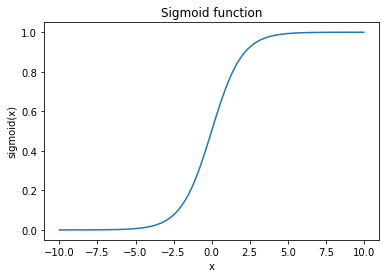

In [127]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def h(x, theta):
    return sigmoid(x @ theta)

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid function')
plt.show()

**Question 2.2** : we will now have to define the cost function $J(\boldsymbol{\theta})$ for our model. For a logistic regression, it is based on the following system of equations:

$$ 
    J(\boldsymbol{\theta})=\left\{
                \begin{array}{ll}
                  - log(h_{ \theta }(\boldsymbol{x})), \quad if \quad y=1\\
                  - log(1-h_{ \theta }(\boldsymbol{x})), \quad if \quad y=0
                \end{array}
              \right.
$$

Write a function implementing the cost function $J(\boldsymbol{\theta})$ of a logistic regression for $n$ training samples by combining these two functions. 

*tips 1*: start by plotting these two functions on a same graph (remember $h(x) \rightarrow [0,1]$)

*tips 2*: remember that a cost function should be highly penalized (i.e. getting a very large value) if the model predicts the wrong class

*tips 3*: split your problems into the different cases. A first case would be where you have $y=1$ and $h(x)=1$, and a second case where you still have $y=1$ but $h(x)=0$. What would be the cost values in both cases ? What now if you have $y=0$ ?

/var/folders/rn/4tf0v5sn6f3b7wc5398q3p780000gn/T/ipykernel_60990/4289057825.py:5: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)
/var/folders/rn/4tf0v5sn6f3b7wc5398q3p780000gn/T/ipykernel_60990/4289057825.py:6: RuntimeWarning: divide by zero encountered in log
  y2 = -np.log(1 - x)


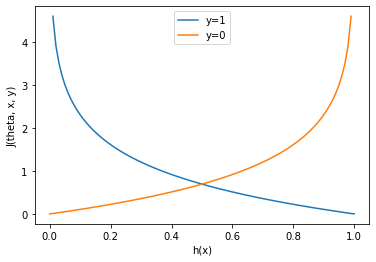

In [128]:
def cost_function(x, y, theta):
    return -np.sum(y * np.log(h(x, theta)) + (1 - y) * np.log(1 - h(x, theta)))

x = np.linspace(0, 1, 100)
y1 = -np.log(x)
y2 = -np.log(1 - x)
plt.plot(x, y1, label='y=1')
plt.plot(x, y2, label='y=0')
plt.xlabel('h(x)')
plt.ylabel('J(theta, x, y)')
plt.legend()
plt.show()

**Question 2.3** : the gradient of $J(\boldsymbol{\theta})$ is given by $$\frac{\partial (J(\boldsymbol{\theta}))}{\partial \boldsymbol{\theta}} = \boldsymbol{x}^T ( h_{ \theta }(\boldsymbol{x}) - \boldsymbol{y})$$

Write a function `def gradient(x,y,theta):` that takes as inputs $x$ and $y$, representing respectively your model inputs and outputs from all your training dataset samples, as well as your $\theta$ parameters to be optimized over this dataset.

In [129]:
def gradient(x, y, theta):
    return x.T @ (h(x, theta) - y)

**Question BONUS** : try to derive yourself the gradient of $J(\boldsymbol{\theta})$, it is quite a long but interesting calcul !

**Question 2.4** : now you can apply your `gradient` function within a classical gradient descent algorithm to estimate the $\theta$ parameters. Find empirically a minimal number of iterations in your gradient descent to have a "satisfying" estimation.

*tips* : use your `cost_func` function to compute the values of your cost function at each iteration and plot it. Basically, when the cost reaches a plateau, then your optimization is done.


In [130]:
theta = np.zeros([X_train.shape[1], 1])
print(np.dot(X_train, theta).shape)

(9000, 1)


In [131]:
def gradient_descent(x, y, alpha, n_iter):
    theta = np.zeros([x.shape[1], 1])
    costs = []
    for i in range(n_iter):
        theta = theta - alpha * gradient(x, y, theta)
        costs.append(cost_function(x, y, theta))
        print(f'Iteration {i+1}/{n_iter} - cost: {costs[-1]} \r', end='', flush=True)
    return theta, costs

# print(X_train.shape)
# theta, costs = gradient_descent(X_train, y_train, 1e-3, 20)
# plt.plot(costs)
# plt.xlabel('Iteration')
# plt.ylabel('Cost')
# plt.title('Cost function')
# plt.show()

**Question 2.5** : compare the $\theta$ values from your logistic regression implementation with the one from the sklearn [LogisticRegressionn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function.

Since sklearn's LogisticRegression automatically does L2 regularization (which we did not implement), set C=1e15 to turn off regularization.

In [132]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e15)
lr.fit(X_train, y_train)
print(lr.coef_)
print(theta)

[[ 0.00575277 -0.00551482]]
[[0.]
 [0.]]


## Model evaluation

**Question 2.6** : compute the accuracy metric for both model implementations.

In [133]:
def accuracy(x, y, theta):
    return np.sum((h(x, theta) > 0.5) == y) / y.shape[0]

print(accuracy(X_train, y_train, theta))
print(lr.score(X_train, y_train))

4508.0
0.47055555555555556


**Question 2.7** : using the sklearn functions [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) sklearn function, evaluate the performance of your logistic regression model with respect to its [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve.

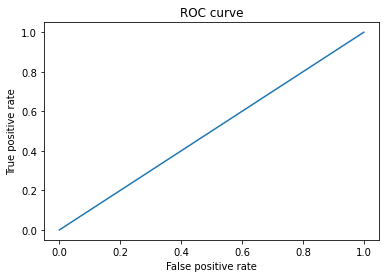

In [134]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, h(X_train, theta))
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# SOURCES

## Synthetic data

- https://peterroelants.github.io/posts/multivariate-normal-primer/

- https://jrnold.github.io/bayesian_notes/appendix.html


## Logistic regression

-   https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

-   https://beckernick.github.io/logistic-regression-from-scratch/

-   https://colab.research.google.com/github/ArunkumarRamanan/Exercises-Machine-Learning-Crash-Course-Google-Developers/blob/master/logistic_regression.ipynb#scrollTo=JjBZ_q7aD9gh
